In [1]:
import os
from shutil import rmtree
import sys

import xarray as xr

sys.path.append('..')

from nk_ooc.test_problem import setup_solver
from nk_ooc import nk_driver

from utils import plot_all_vars

%matplotlib inline

In [2]:
wdir = os.path.join(os.getenv("HOME"), "test_run_latest_dye_decay_wdir")
if os.path.exists(wdir):
    if os.path.isfile(wdir):
        os.remove(wdir)
    else:
        rmtree(wdir)

In [3]:
# args common to all invocations to parse_args
args_base = ["--workdir", wdir, "--logging_reproducible", "--tracer_module_names", "dye_decay_{suff}:001:010:100",
             "--newton_rel_tol", "1.0e-7"]

In [4]:
setup_solver.main(setup_solver.parse_args(args_base + ["--fp_cnt", "1"]))

setup_solver.py:main:args.cfg_fnames="$repo_root/input/test_problem/newton_krylov.cfg,$repo_root/input/test_problem/model_params.cfg"
gen_invoker_script.py:gen_invoker_script:generating $workdir/nk_driver.sh
setup_solver.py:main:grid_weight_fname="$workdir/depth_axis.nc"
setup_solver.py:main:fp_iter=0
setup_solver.py:main:init_iterate_fname="$workdir/gen_init_iterate/init_iterate.nc"


<xarray.Dataset>
Dimensions:        (depth: 30, nbnds: 2, depth_edges: 31)
Coordinates:
  * depth          (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges    (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds   (depth, nbnds) float64 ...
    depth_delta    (depth) float64 ...
    dye_decay_001  (depth) float64 ...
    dye_decay_010  (depth) float64 ...
    dye_decay_100  (depth) float64 ...


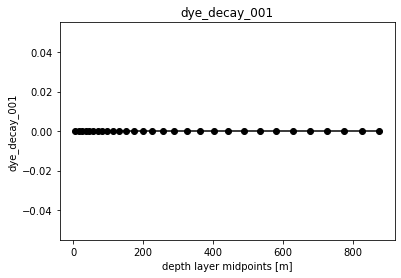

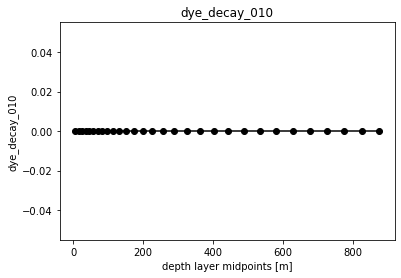

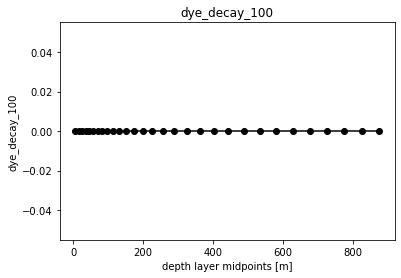

In [5]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate_00.nc")) as ds:
    del ds.attrs["history"]
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:                   (time: 101, depth: 30, nbnds: 2, depth_edges: 31)
Coordinates:
  * time                      (time) object 0001-01-01 00:00:00 ... 0002-01-0...
  * depth                     (depth) float64 5.0 15.01 25.07 ... 825.0 875.0
  * depth_edges               (depth_edges) float64 0.0 10.0 ... 850.0 900.0
Dimensions without coordinates: nbnds
Data variables: (12/22)
    depth_bounds              (depth, nbnds) float64 ...
    depth_delta               (depth) float64 ...
    bldepth                   (time) float64 ...
    mixing_coeff              (time, depth_edges) float64 ...
    dye_decay_001             (time, depth) float64 ...
    dye_decay_001_time_mean   (depth) float64 ...
    ...                        ...
    dye_decay_100             (time, depth) float64 ...
    dye_decay_100_time_mean   (depth) float64 ...
    dye_decay_100_time_anom   (time, depth) float64 ...
    dye_decay_100_time_std    (depth) float64 ...
    dye_decay_100_tim

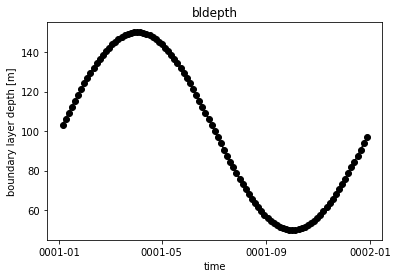

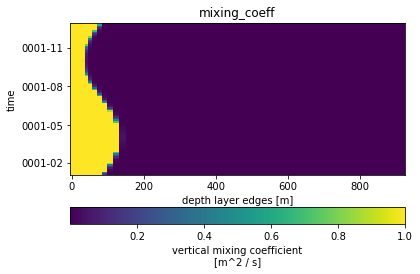

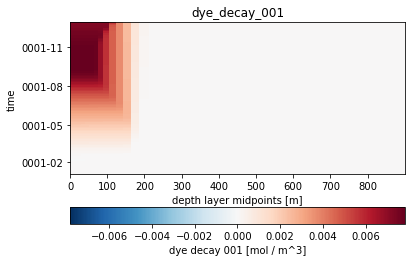

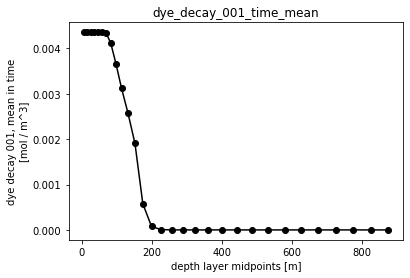

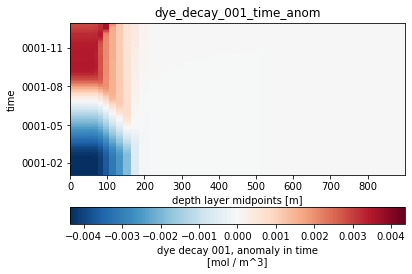

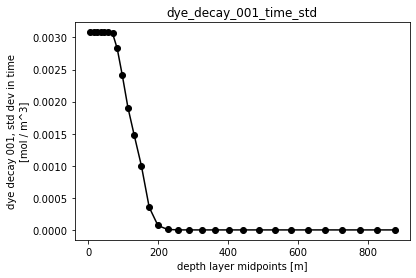

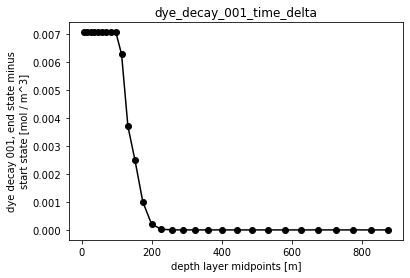

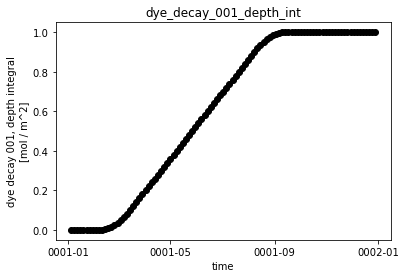

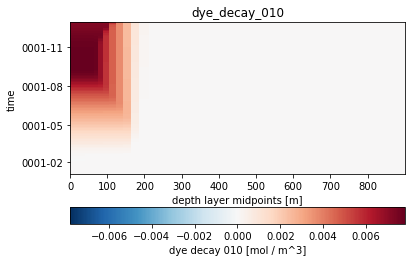

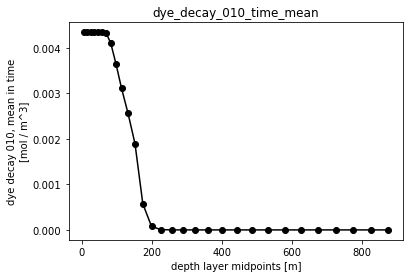

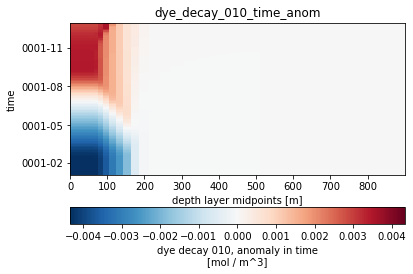

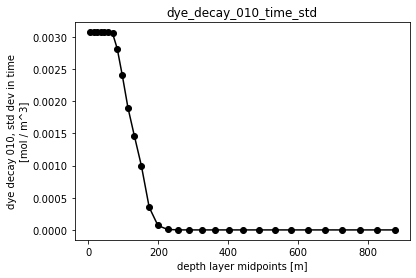

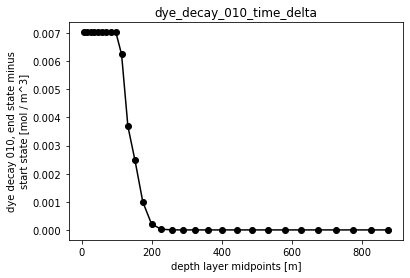

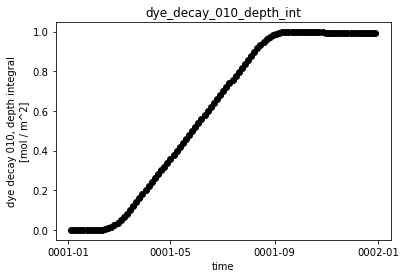

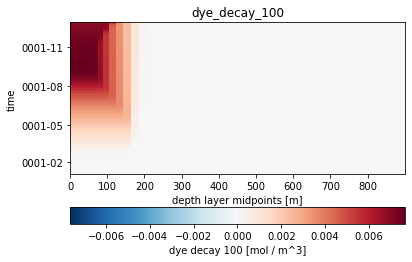

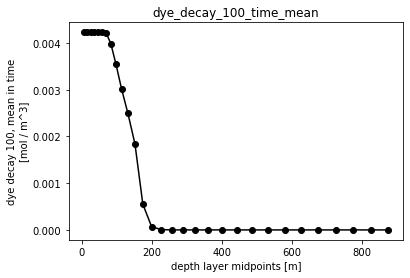

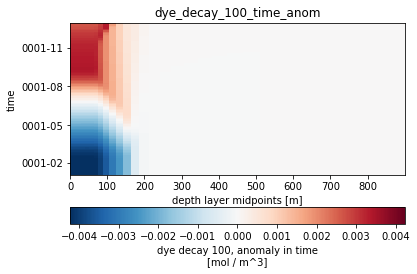

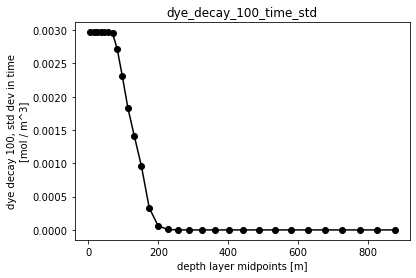

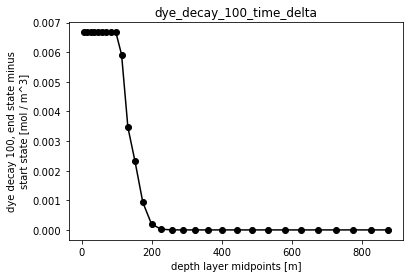

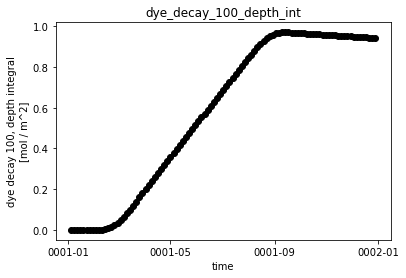

In [6]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "hist_00.nc")) as ds:
    del ds.attrs["history"]
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:        (depth: 30, nbnds: 2, depth_edges: 31)
Coordinates:
  * depth          (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges    (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds   (depth, nbnds) float64 ...
    depth_delta    (depth) float64 ...
    dye_decay_001  (depth) float64 ...
    dye_decay_010  (depth) float64 ...
    dye_decay_100  (depth) float64 ...


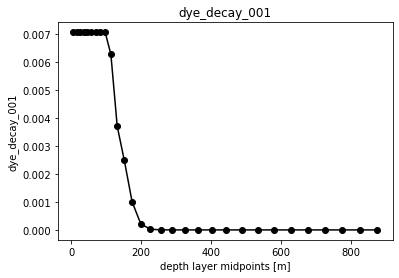

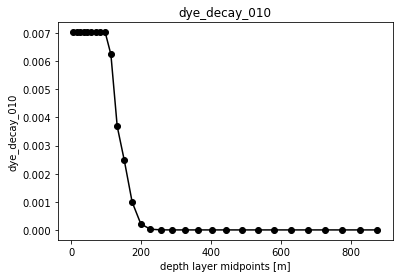

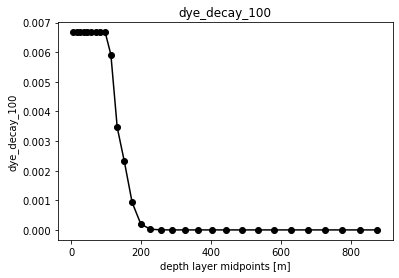

In [7]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "fcn_00.nc")) as ds:
    del ds.attrs["history"]
    print(ds)
    plot_all_vars(ds)

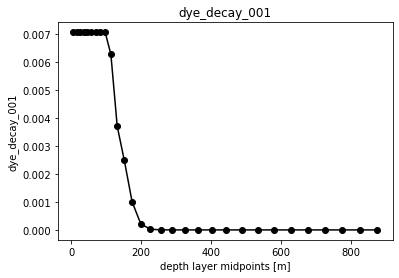

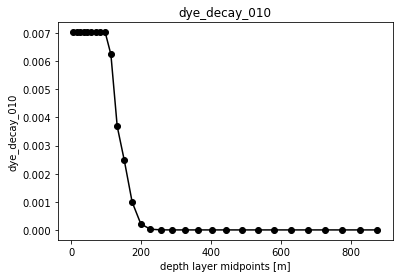

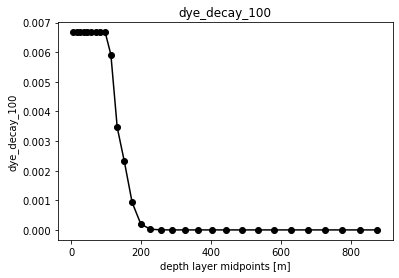

In [8]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate.nc")) as ds:
    plot_all_vars(ds)

In [9]:
nk_driver.main(nk_driver.parse_args(args_base + ["--persist"]))

model_state_base.py:get_model_state_class:using class ModelState from nk_ooc.test_problem.model_state for model state
model_config.py:__init__:loading content from $repo_root/input/test_problem/tracer_module_defs.yaml
model_config.py:check_shadow_tracers:tracer module phosphorus has po4_s as a shadow for po4
model_config.py:check_shadow_tracers:tracer module phosphorus has dop_s as a shadow for dop
model_config.py:check_shadow_tracers:tracer module phosphorus has pop_s as a shadow for pop
model_config.py:__init__:reading depth_delta from $workdir/depth_axis.nc for grid_weight
solver_state.py:__init__:"Newton" iteration now 0
tracer_module_state_base.py:log_vals:iteration=00,iterate,mean[dye_decay_001]=1.110445e-03
tracer_module_state_base.py:log_vals:iteration=00,iterate,norm[dye_decay_001]=2.647522e-03
tracer_module_state_base.py:log_vals:iteration=00,iterate,mean[dye_decay_010]=1.104466e-03
tracer_module_state_base.py:log_vals:iteration=00,iterate,norm[dye_decay_010]=2.633554e-03
tra

<xarray.Dataset>
Dimensions:                         (iteration: 4, region: 1, depth: 30,
                                     nbnds: 2, depth_edges: 31)
Coordinates:
  * iteration                       (iteration) int32 0 1 2 3
  * region                          (region) int32 0
  * depth                           (depth) float64 5.0 15.01 ... 825.0 875.0
  * depth_edges                     (depth_edges) float64 0.0 10.0 ... 900.0
Dimensions without coordinates: nbnds
Data variables: (12/30)
    iterate_mean_dye_decay_001      (iteration, region) float64 ...
    iterate_mean_dye_decay_010      (iteration, region) float64 ...
    iterate_mean_dye_decay_100      (iteration, region) float64 ...
    iterate_norm_dye_decay_001      (iteration, region) float64 ...
    iterate_norm_dye_decay_010      (iteration, region) float64 ...
    iterate_norm_dye_decay_100      (iteration, region) float64 ...
    ...                              ...
    Krylov_iterations               (iteration) floa

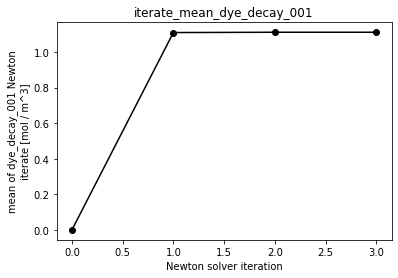

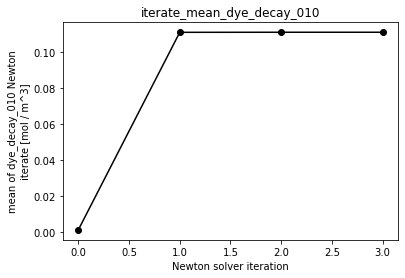

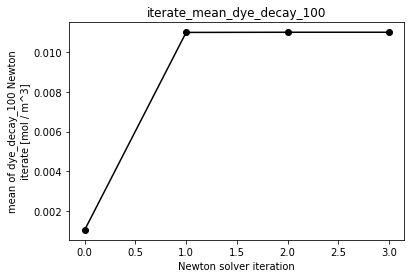

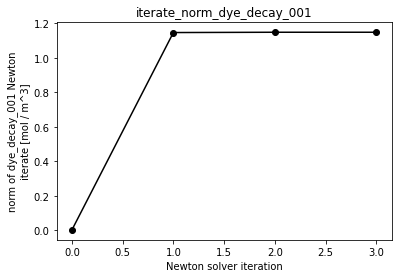

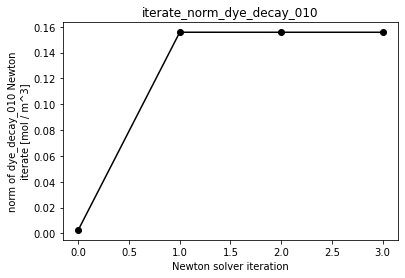

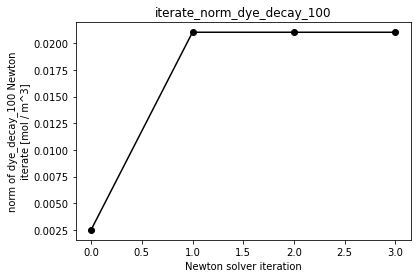

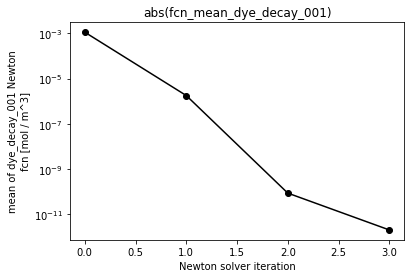

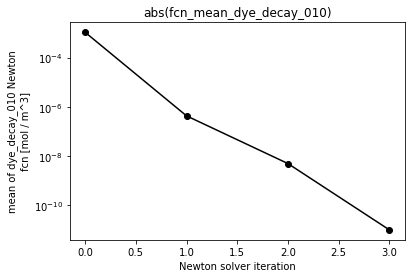

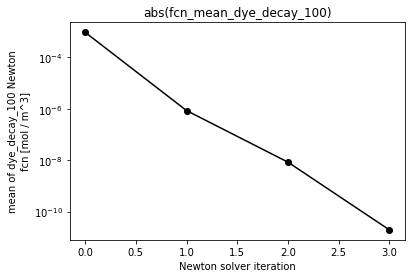

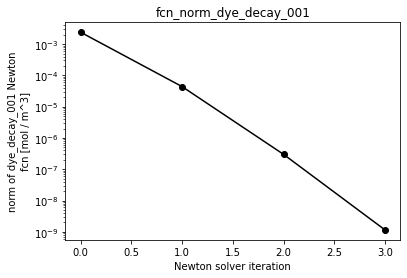

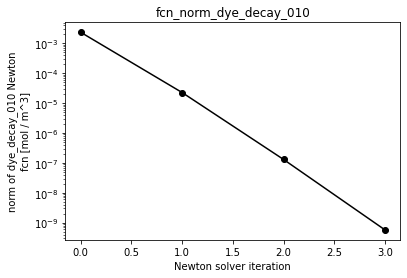

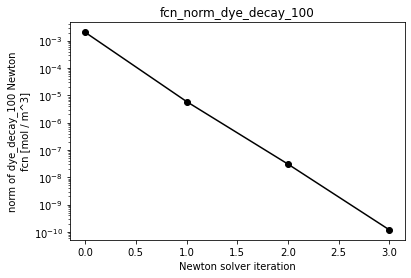

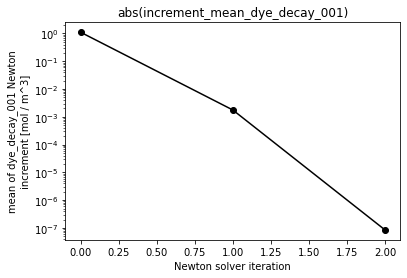

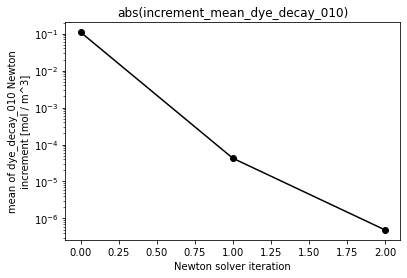

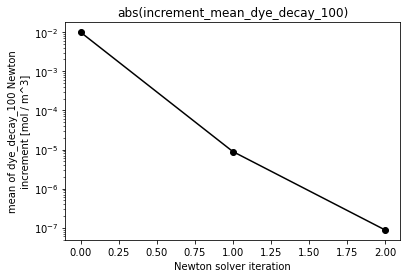

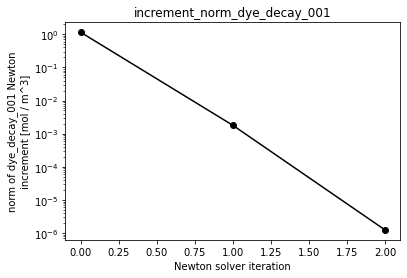

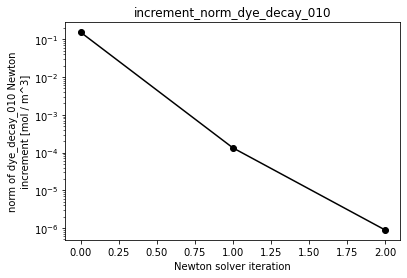

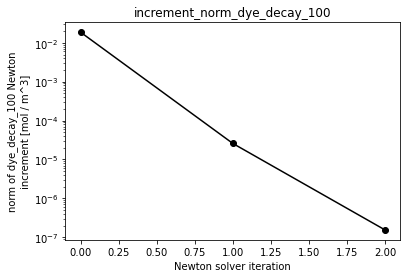

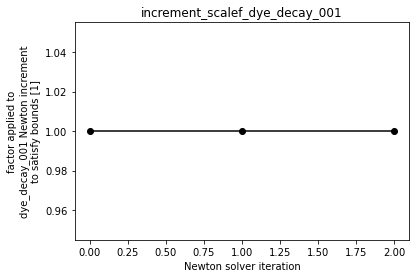

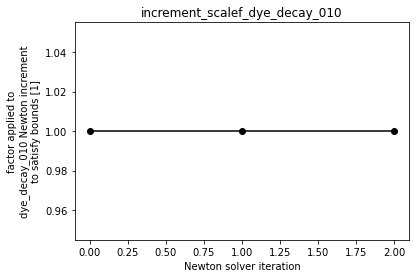

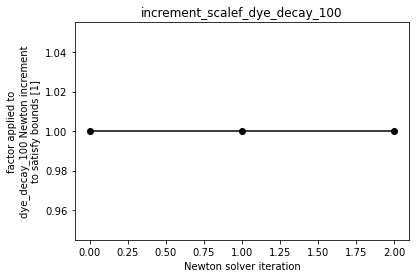

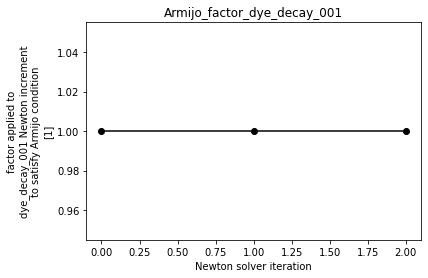

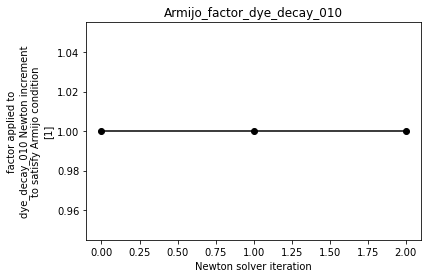

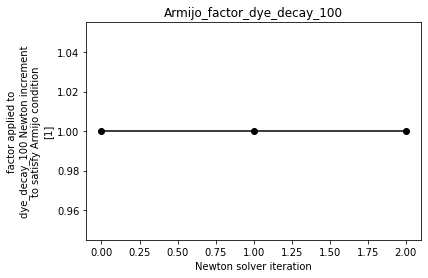

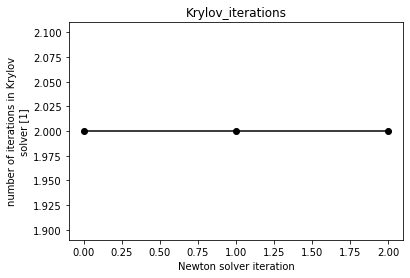

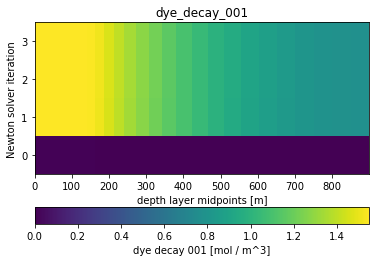

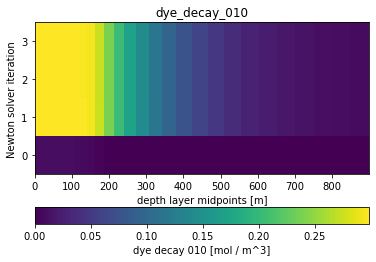

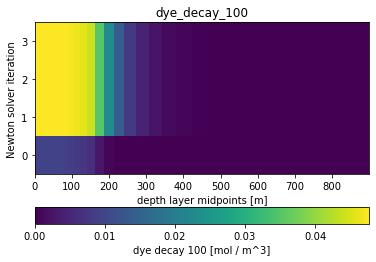

In [10]:
with xr.open_dataset(os.path.join(wdir, "Newton_stats.nc")) as ds:
    del ds.attrs["history"]
    print(ds)
    plot_all_vars(ds)
    iterations = len(ds["iteration"])

In [11]:
iter_str_final = f"{iterations-1:02d}"
print(iter_str_final)

03


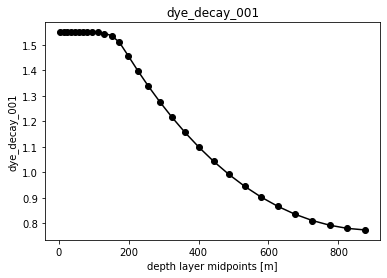

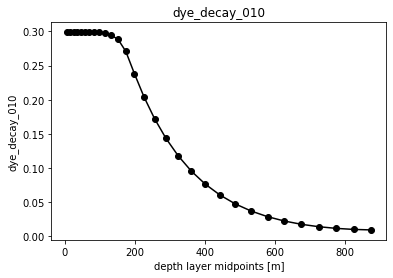

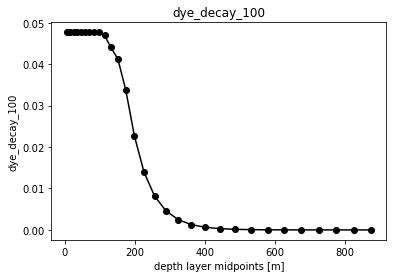

In [12]:
with xr.open_dataset(os.path.join(wdir, f"iterate_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

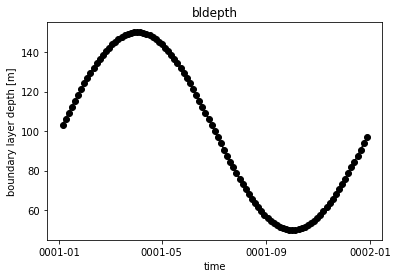

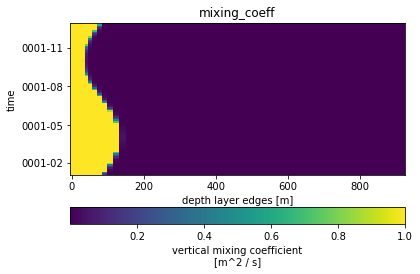

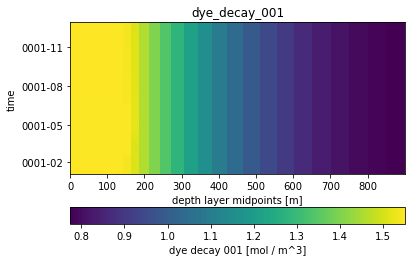

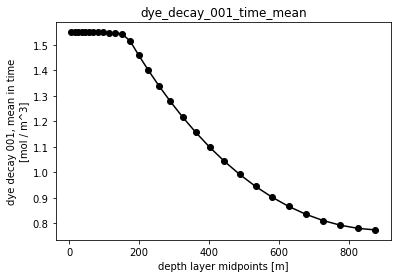

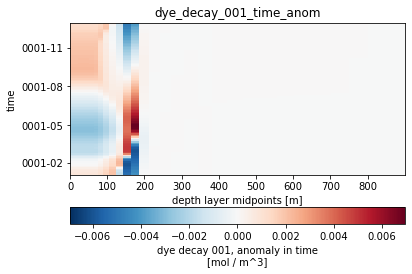

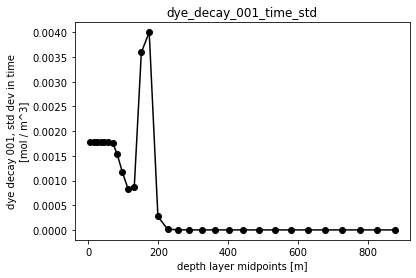

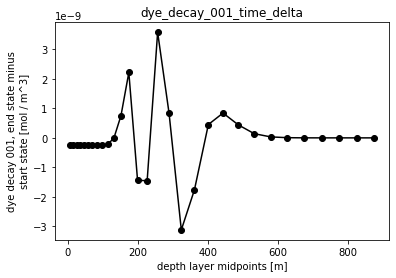

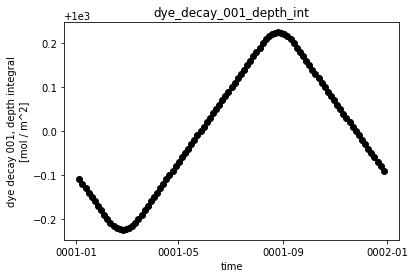

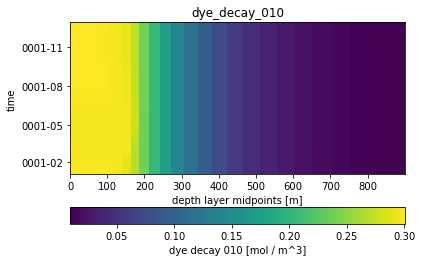

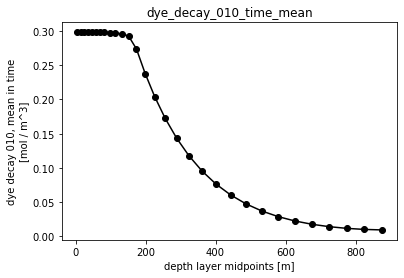

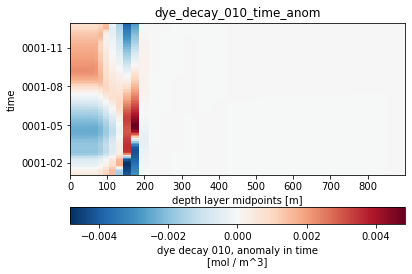

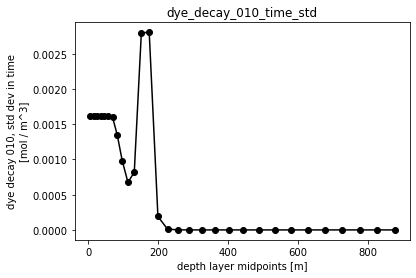

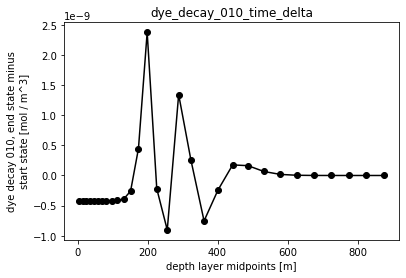

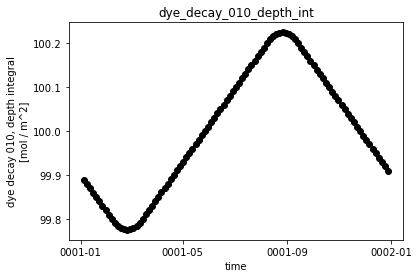

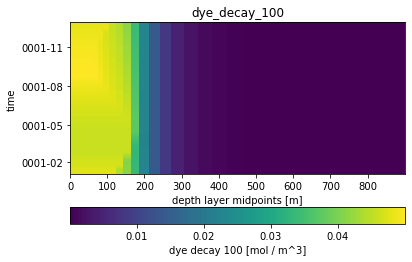

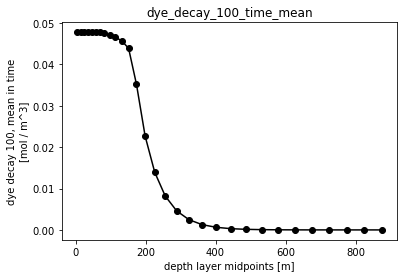

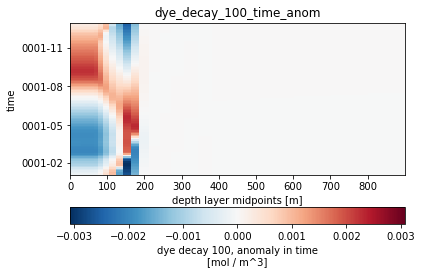

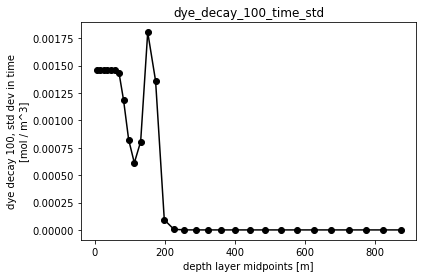

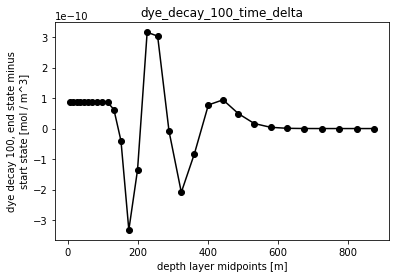

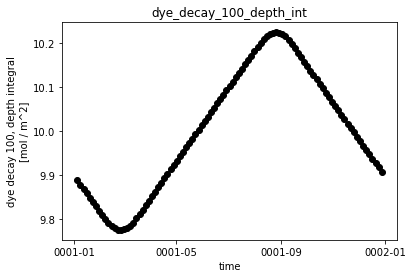

In [13]:
with xr.open_dataset(os.path.join(wdir, f"hist_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

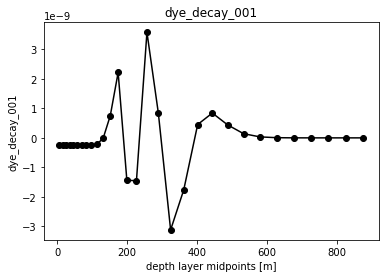

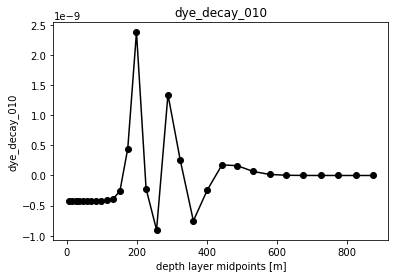

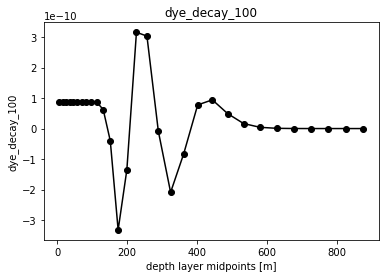

In [14]:
with xr.open_dataset(os.path.join(wdir, f"fcn_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)